# __Python and Datascience Workshop__
Author: Mohammad Akradi <sup>1</sup> <br>
<sup>1</sup> Institute of Medical Science and Technology, Shahid Beheshti University, Tehran, Iran

## __Session 3__
In this session, we will learn how to visualize our data. Data visualization is an interdisciplinary field that deals with the graphic representation of data. It is a particularly efficient way of communicating when the data is numerous as for example a time series.

---
## 1. Matplotlib
[Reference](https://matplotlib.org/)

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

* Installation

```python
!pip install matplotlib
```

as our first example, we will represent `sepal` featrures from `iris` dataset.

* Example #1:

```python
import matplotlib.pyplot as plt
import pandas as pd

iris = pd.read_csv("Materials/iris.csv")

plt.scatter("sepal_width", "sepal_length", data=iris)
```

pandas dataframes have plot attribute, in the next example, we will learn another way to plot a dataframe:

* Example #2:

```python
# plot all numerical features
iris.plot()

# set x-axis 
iris.plot("species")

# select arbitrary features to plot
iris[["petal_length", "petal_width", "species"]].plot("species")
```

now, imagine we want to represent a scatterplot of `sepal_length` vs `sepal_width`, we need to show this scatter plot colored by `species`. there is several ways to do this. let's see below example:

* Example #3:

```python
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

iris.plot.scatter("sepal_width", "sepal_length", c = iris["species"].map(colors))

# for extra options to modify, we need to use matplotlib instead of pandas:
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

plt.scatter(iris["sepal_width"], iris["sepal_length"], c = iris["species"].map(colors))
plt.show()

# for even more midifications, we can use groupby function:
groups = iris.groupby("species")

fig, ax = plt.subplots()

for name, group in groups:
    ax.scatter(group["sepal_length"], group["sepal_width"], label = name)

ax.legend()
plt.show()
```

Also, we can use `seaborn` module for visualization:

* Example #4:

```python
import seaborn as sns

sns.scatterplot("petal_width", "petal_length", data=iris, hue="species")
plt.show()
```

we can change our plot's style, in the following example, we will use `ggplot` style for the rest of our plots:

* Example #5:

```python
from matplotlib import style

style.use('ggplot')

iris["petal_length"].plot()
plt.show()
```

we can set or change y-axis and x-axis labels or title and so on:

* Example #6:

```python
plt.scatter('sepal_length', 'sepal_width', data = iris)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

# Add Title
plt.scatter('sepal_length', 'sepal_width', data = iris, alpha = 0.5)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("iris sepal scatter plot")
plt.show()

# Add legend
plt.scatter('sepal_length', 'sepal_width', data = iris, alpha = 0.5, label = 'sepal')
plt.scatter('petal_length', 'petal_width', data = iris, alpha = 0.5, label = 'petal')
plt.xlabel("length")
plt.ylabel("width")
plt.title("Title")
plt.legend(loc = 'upper left')
plt.show()
```

sometimes, we need to subplot but with shared axis, in this case x-axis:

* Example #7:

```python
ax1 = plt.subplot2grid((10, 1), (0, 0), rowspan=5, colspan=1) ## 10 rows and 1 column
ax2 = plt.subplot2grid((10, 1), (5, 0), rowspan=5, colspan=1) ## sharing axes

ax1.scatter('sepal_length', 'sepal_width', data = iris, alpha = 0.5, label = 'sepal', c = 'blue')
ax2.scatter('petal_length', 'petal_width', data = iris, alpha = 0.5, label = 'petal')

ax2.set_xlabel("Length")

ax1.set_ylabel("Width")

ax2.set_ylabel("Width")

plt.show()
```

if you w

In [14]:
%matplotlib inline

TypeError: 'other' must be an instance of matplotlib.axes._base._AxesBase, not a bool

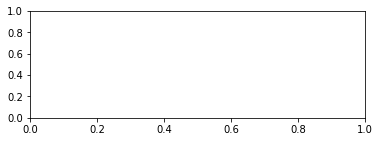

In [16]:
ax1 = plt.subplot2grid((10, 1), (0, 0), rowspan=5, colspan=1) ## 10 rows and 1 column
ax2 = plt.subplot2grid((10, 1), (5, 0), rowspan=5, colspan=1, sharex=ax1) ## sharing axes

ax1.scatter('sepal_length', 'sepal_width', data = iris, alpha = 0.5, label = 'sepal', c = 'blue')
ax2.scatter('petal_length', 'petal_width', data = iris, alpha = 0.5, label = 'petal')

ax2.set_xlabel("Length")

ax1.set_ylabel("Width")

ax2.set_ylabel("Width")

plt.show()